## 통계란?

### 의의 : 통계학은 자료를 수집하고 정리하며, 
### 이로부터 미지의 사실에 대한 신빙성 있는 추론을 연구하는 학문

### 모집단 : 통계적 추론의 대상
### 표본 : 추론의 도구 ... -> pt 올려주심

## 표본 평균의 분포 (Sampling Distribution)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### 중심극한 정리
#### 임의의 모집단 가정 : {1,2,3,4,5,6,7,8,9}
#### 표본크기 5인 복원추출 실시

In [2]:
para = [num for num in range(1,10)]

In [3]:
para

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [4]:
np.random.seed(10)
np.random.choice(para, 5, replace = True)

array([5, 1, 2, 1, 2])

In [5]:
sample_5 = np.zeros((100,5))

In [6]:
np.random.seed(10)
for i in range(100):
    sample_5[i] = np.random.choice(para, 5, replace=True)

sample_5[:5, :] # 100회 샘플링 중 5개 보기

array([[5., 1., 2., 1., 2.],
       [9., 1., 9., 7., 5.],
       [4., 1., 5., 7., 9.],
       [2., 9., 5., 2., 4.],
       [7., 6., 4., 7., 2.]])

In [7]:
sample_mean5 = np.mean(sample_5, axis=1)

In [8]:
sample_mean5

array([2.2, 6.2, 5.2, 4.4, 5.2, 6.4, 5.6, 5.2, 5.8, 6.2, 7.6, 3.6, 5.8,
       3.4, 3.4, 2.8, 1.8, 2.2, 4.6, 3.8, 5. , 4.8, 7.6, 4.8, 7.8, 4.4,
       4.2, 5.4, 4.4, 5.6, 3.2, 8. , 4. , 5. , 5.6, 3.4, 5.8, 5.2, 5.8,
       5.4, 3.4, 4.4, 3. , 5.4, 3.2, 5.6, 3.2, 5.2, 6.4, 2.2, 3.2, 5.6,
       4.2, 2.4, 4.6, 5.8, 4.8, 5.4, 3.4, 6. , 5.8, 4.6, 5.2, 5.4, 4.2,
       5.2, 4.2, 6.6, 4.2, 3. , 3. , 7.4, 6.8, 5. , 6.4, 6.2, 3.8, 7.2,
       5.8, 4.2, 3.2, 4.6, 5.6, 4.8, 7. , 5.6, 6. , 5.4, 3.8, 2.6, 5. ,
       5.4, 3. , 6.8, 5.6, 4.8, 3.8, 4.8, 5.8, 5.4])

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


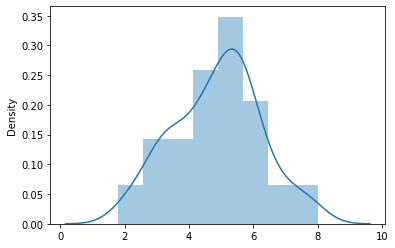

In [9]:
sns.distplot(sample_mean5[:,np.newaxis])
# newaxis 는 얘를 칼럼으로 세워서 봐야하니까 매기는 것.

In [10]:
sample_30 = np.zeros((100,30))

In [11]:
np.random.seed(10)
for i in range(100):
    sample_30[i] = np.random.choice(para, 30, replace = True)

In [12]:
sample_mean30 = np.mean(sample_30, axis = 1)

In [13]:
sample_mean = np.hstack((sample_mean5[:,np.newaxis], sample_mean30[:,np.newaxis]))

In [14]:
sample_mean[:5,:]

array([[2.2       , 4.93333333],
       [6.2       , 5.66666667],
       [5.2       , 3.23333333],
       [4.4       , 5.1       ],
       [5.2       , 5.3       ]])

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


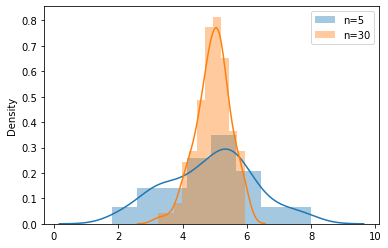

In [15]:
sns.distplot(sample_mean[:,np.newaxis,0], label = 'n=5')
sns.distplot(sample_mean[:,np.newaxis,1], label = 'n=30')
plt.legend()

#### 표본의 크기가 커지니까, n 이 큰만큼 표준오차 작아져서 더 치솟는 그래프(중앙에 밀집)

---

## 모평균 & 모표준편차

In [16]:
mu = np.mean(para)
sigma = np.std(para)

In [17]:
print(mu)
print(sigma)

5.0
2.581988897471611


## 표본평균의 평균

In [18]:
sample_mean5

array([2.2, 6.2, 5.2, 4.4, 5.2, 6.4, 5.6, 5.2, 5.8, 6.2, 7.6, 3.6, 5.8,
       3.4, 3.4, 2.8, 1.8, 2.2, 4.6, 3.8, 5. , 4.8, 7.6, 4.8, 7.8, 4.4,
       4.2, 5.4, 4.4, 5.6, 3.2, 8. , 4. , 5. , 5.6, 3.4, 5.8, 5.2, 5.8,
       5.4, 3.4, 4.4, 3. , 5.4, 3.2, 5.6, 3.2, 5.2, 6.4, 2.2, 3.2, 5.6,
       4.2, 2.4, 4.6, 5.8, 4.8, 5.4, 3.4, 6. , 5.8, 4.6, 5.2, 5.4, 4.2,
       5.2, 4.2, 6.6, 4.2, 3. , 3. , 7.4, 6.8, 5. , 6.4, 6.2, 3.8, 7.2,
       5.8, 4.2, 3.2, 4.6, 5.6, 4.8, 7. , 5.6, 6. , 5.4, 3.8, 2.6, 5. ,
       5.4, 3. , 6.8, 5.6, 4.8, 3.8, 4.8, 5.8, 5.4])

In [19]:
print(np.mean(sample_mean5))
print(np.std(sample_mean5))

4.8740000000000006
1.3607806582987576


## 표본표준편차를 구해보자
## 표본 분산

In [20]:
np.sum((sample_mean5 - mu)**2)/(sample_mean5.size - 1)
## (표본평균-모평균)제곱 / n-1

1.8864646464646462

In [21]:
np.sqrt(np.sum((sample_mean5 - mu)**2)/(sample_mean5.size - 1))
## (표본평균-모평균)제곱 / n-1 을 루트씌운거

1.3734863109855322

In [22]:
sigma/np.sqrt(5) ##표준오차

1.1547005383792515

In [23]:
np.sum((sample_mean30 - mu)**2)/(sample_mean30.size - 1)

0.28517396184062854

In [24]:
np.sqrt(np.sum((sample_mean30 - mu)**2)/(sample_mean30.size - 1))

0.5340168179380014

In [25]:
sigma/np.sqrt(30)

0.4714045207910317

## 5일때보다 30일 때 모집단과 가까워지기 시작... n이 충분히 커져야

## 연습 - 표본의 크기가 100일 때, 표본표준편차를 구하고 표준오차와 비교

In [27]:
np.random.seed(10)
sample_100 = np.zeros((100,100))
for i in range(100):
    sample_100[i] = np.random.choice(para, 100, replace = True)
sample_100

array([[5., 1., 2., ..., 3., 7., 1.],
       [6., 2., 4., ..., 4., 9., 4.],
       [1., 7., 3., ..., 9., 1., 8.],
       ...,
       [8., 2., 4., ..., 6., 6., 6.],
       [2., 5., 8., ..., 2., 4., 4.],
       [1., 5., 5., ..., 3., 4., 7.]])

In [28]:
sample_mean100 = np.mean(sample_100, axis = 1)

In [29]:
sample_mean100

array([4.57, 5.27, 4.37, 5.21, 4.95, 5.32, 5.  , 5.4 , 4.86, 4.94, 4.85,
       4.58, 5.08, 4.91, 5.26, 4.77, 4.86, 5.34, 4.88, 4.84, 4.84, 4.72,
       5.23, 5.18, 5.02, 4.41, 5.15, 5.  , 5.11, 4.45, 4.92, 5.01, 5.3 ,
       5.04, 4.98, 4.9 , 4.52, 4.68, 4.99, 5.23, 5.43, 4.68, 5.11, 5.08,
       4.98, 5.15, 4.86, 4.82, 4.66, 5.37, 4.9 , 4.99, 4.75, 4.76, 4.79,
       4.95, 5.25, 5.24, 4.51, 5.31, 4.84, 5.09, 4.76, 4.88, 4.91, 4.71,
       4.97, 4.62, 5.39, 4.84, 5.21, 5.11, 5.04, 4.86, 5.06, 4.75, 5.1 ,
       5.15, 4.9 , 5.13, 4.97, 4.75, 4.72, 5.17, 4.98, 4.76, 4.81, 5.01,
       5.05, 4.49, 4.83, 5.11, 4.76, 5.32, 4.64, 4.95, 5.16, 5.31, 4.7 ,
       5.13])

In [30]:
np.sum((sample_mean100 - mu)**2) / (sample_mean100.size - 1)

0.06004545454545455

In [31]:
np.sqrt(np.sum((sample_mean100 - mu)**2) / (sample_mean100.size - 1))
## 표본표준편차

0.24504174041467822

In [32]:
sigma/np.sqrt(100)
## 표준오차

0.2581988897471611

---

연습문제

## 영화 평점 데이터

[데이터 설명] 

- user data : ['user_id', 'gender', 'age', 'occupation', 'zip']

- ratings data : ['user_id', 'movie_id', 'rating', 'timestamp']

- movies data : ['movie_id', 'title', 'genres']

--> 동일 컬럼을 키로 하여 데이터 병합 실시(pd.merge())



### 영화 평점 데이터를 활용하여 다음을 실시해보세요



1. 데이터 탐색 : NA가 있는지 탐색



2. 영화별 성별 평점 평균을 산출하여 여성 상위/하위 10개 영화의 목록 추출 및 도식화(barplot)


3. 영화 평점 정보가 300건 이상 있는 영화에 대하여 여성에게 인기가 높은 상위 10개 영화

- 인기도는 평점으로 평가

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# dataframe display 행 조정
pd.options.display.max_rows = 10

In [3]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
users = pd.read_csv('movielens/users.dat', sep='::',
                      header=None, names=unames, engine='python')

rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
ratings = pd.read_csv('movielens/ratings.dat', sep='::',
                        header=None, names=rnames, engine='python')

mnames = ['movie_id', 'title', 'genres']
movies = pd.read_csv('movielens/movies.dat', sep='::',
                       names=mnames, engine='python')

In [6]:
users[:5]

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


#### 데이터 타입 확인

In [5]:
users.dtypes

user_id        int64
gender        object
age            int64
occupation     int64
zip           object
dtype: object

zip 컬럼이 object로 되어 있으나 사용하지 않으므로 무시하고 진행

In [7]:
ratings[:5]

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
movies[:5]

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


#### 데이터 병합

판다스 merge() 메서드를 이용해 병합 진행.

In [9]:
help(pd.merge)

Help on function merge in module pandas.core.reshape.merge:

merge(left, right, how='inner', on=None, left_on=None, right_on=None, left_index=False, right_index=False, sort=False, suffixes=('_x', '_y'), copy=True, indicator=False, validate=None)
    Merge DataFrame or named Series objects with a database-style join.
    
    The join is done on columns or indexes. If joining columns on
    columns, the DataFrame indexes *will be ignored*. Otherwise if joining indexes
    on indexes or indexes on a column or columns, the index will be passed on.
    
    Parameters
    ----------
    left : DataFrame
    right : DataFrame or named Series
        Object to merge with.
    how : {'left', 'right', 'outer', 'inner'}, default 'inner'
        Type of merge to be performed.
    
        * left: use only keys from left frame, similar to a SQL left outer join;
          preserve key order.
        * right: use only keys from right frame, similar to a SQL right outer join;
          preserve key 

left join 방식의 병합을 통해 발생할 수 있는 NA를 미리 방지

In [10]:
data = pd.merge(pd.merge(ratings, users, how = 'left'), movies, how = 'left')

In [11]:
np.unique(data['rating'].isna())

array([False])

In [12]:
np.unique(data['user_id'].isna())

array([False])

In [13]:
np.unique(data['gender'].isna())

array([False])

In [14]:
data.iloc[0]

user_id                                            1
movie_id                                        1193
rating                                             5
timestamp                                  978300760
gender                                             F
age                                                1
occupation                                        10
zip                                            48067
title         One Flew Over the Cuckoo's Nest (1975)
genres                                         Drama
Name: 0, dtype: object

### 1. 영화별 성별 평점 평균 구하기(상위 10개)

In [15]:
## 방안 1 : pivot table

mean_ratings = data.pivot_table('rating', index='title',
                                columns='gender', aggfunc='mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [16]:
## 방법 2 : groupby

mean_ratings1 = data['rating'].groupby([data['title'],data['gender']])

In [18]:
mean_ratings11 = mean_ratings1.mean().unstack()
mean_ratings11

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140
Zero Kelvin (Kj�rlighetens kj�tere) (1995),NaN,3.500000


In [19]:
mean_ratings11[mean_ratings11['F'].isna()]

gender,F,M
title,,
3 Strikes (2000),NaN,2.750000
"Alarmist, The (1997)",NaN,2.625000
All Things Fair (1996),NaN,3.333333
American Strays (1996),NaN,2.000000
An Unforgettable Summer (1994),NaN,3.000000
...,...,...
With Friends Like These... (1998),NaN,4.000000
"Wooden Man's Bride, The (Wu Kui) (1994)",NaN,3.000000
Year of the Horse (1997),NaN,3.250000


In [20]:
np.bincount(mean_ratings11[mean_ratings11['F'].isna()]['M'].isna())

array([225], dtype=int64)

In [21]:
mean_ratings11[mean_ratings11['M'].isna()]

gender,F,M
title,,
Aiqing wansui (1994),3.00,NaN
"Alley Cats, The (1968)",4.00,NaN
Anna (1996),4.00,NaN
Bittersweet Motel (2000),5.00,NaN
Chain of Fools (2000),3.00,NaN
...,...,...
Soft Toilet Seats (1999),3.00,NaN
Song of Freedom (1936),5.00,NaN
Talk of Angels (1998),2.50,NaN


In [22]:
np.bincount(mean_ratings11[mean_ratings11['M'].isna()]['F'].isna())

array([35], dtype=int64)

위와 같이 특정 영화에 남성 혹은 여성 한쪽만 평점을 준 영화가 다수 존재하고 groupby 후 NA를 발생시킴.

또한 다시 한번 확인을 위해 양쪽 모두에 NA가 존재하는 경우는 없다

In [24]:
data.loc[data['title']=='Zero Kelvin (Kj�rlighetens kj�tere) (1995)']

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
223072,1352,1364,3,1031532546,M,35,20,94122,Zero Kelvin (Kj�rlighetens kj�tere) (1995),Action
713903,4277,1364,4,1000961159,M,35,16,98133,Zero Kelvin (Kj�rlighetens kj�tere) (1995),Action


In [25]:
# merge 원본데이터에서 여성 중 rating 없는 사람? NA 재확인
data.loc[data['gender']=='F',:]['rating'].isna()

0         False
1         False
2         False
3         False
4         False
          ...  
999863    False
999864    False
999865    False
999866    False
999867    False
Name: rating, Length: 246440, dtype: bool

In [26]:
type(mean_ratings11)

pandas.core.frame.DataFrame

### groupby 후 NA 발생하므로 NA 삭제 결정

[어느 한쪽에 NA가 있는 영화 수 확인]

In [27]:
np.bincount(mean_ratings11['F'].isnull() == mean_ratings11['M'].isnull())

array([ 260, 3446], dtype=int64)

In [28]:
mean_ratings11['F'].isnull() == mean_ratings11['M'].isnull()

title
$1,000,000 Duck (1971)                         True
'Night Mother (1986)                           True
'Til There Was You (1997)                      True
'burbs, The (1989)                             True
...And Justice for All (1979)                  True
                                              ...  
Zed & Two Noughts, A (1985)                    True
Zero Effect (1998)                             True
Zero Kelvin (Kj�rlighetens kj�tere) (1995)    False
Zeus and Roxanne (1997)                        True
eXistenZ (1999)                                True
Length: 3706, dtype: bool

어느 한쪽에 na가 있는 경우 삭제 위해 dropna() 메서드의 파라미터 how = 'any' 적용

In [30]:
mean_ratings111 = mean_ratings11.dropna(how='any')

In [31]:
mean_ratings111

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024
...,...,...
Your Friends and Neighbors (1998),2.888889,3.536585
"Zed & Two Noughts, A (1985)",3.500000,3.380952
Zero Effect (1998),3.864407,3.723140


In [32]:
np.unique(mean_ratings111['F'].isna())

array([False])

In [33]:
np.bincount(mean_ratings111['F'].isna())

array([3446], dtype=int64)

In [34]:
np.bincount(mean_ratings111['M'].isna())

array([3446], dtype=int64)

### 1.1 성별 평점평균 상위/하위 10개 영화

In [36]:
# female
female_pref_top = mean_ratings111.sort_values('F', ascending=False)[:10]

female_pref_top

gender,F,M
title,,
Coldblooded (1995),5.0,3.588235
"Gate of Heavenly Peace, The (1995)",5.0,5.000000
"Other Side of Sunday, The (S�ndagsengler) (1996)",5.0,2.928571
"Brother, Can You Spare a Dime? (1975)",5.0,3.642857
"Big Combo, The (1955)",5.0,3.600000
Country Life (1994),5.0,2.000000
Lamerica (1994),5.0,4.666667
24 7: Twenty Four Seven (1997),5.0,3.750000
Raw Deal (1948),5.0,3.307692


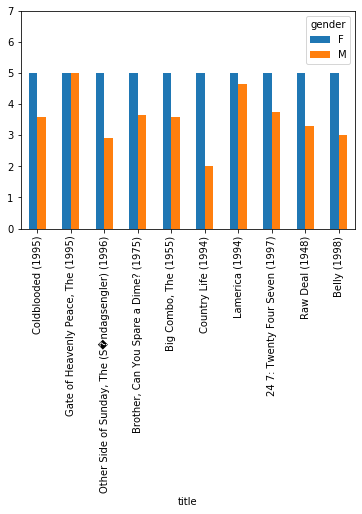

In [37]:
female_pref_top.plot.bar(stacked=False, ylim = (0,7))
plt.show()

In [38]:
# female
female_pref_bottom = mean_ratings111.sort_values('F', ascending=False)[-10:]

In [39]:
female_pref_bottom

gender,F,M
title,,
"Sixth Man, The (1997)",1.0,2.647059
Spring Fever USA (a.k.a. Lauderdale) (1989),1.0,1.000000
Parasite (1982),1.0,2.500000
Power 98 (1995),1.0,2.200000
Big Bully (1996),1.0,2.000000
Meet Wally Sparks (1997),1.0,2.409091
"Enfer, L' (1994)",1.0,3.750000
Stalingrad (1993),1.0,3.593750
Carnosaur 3: Primal Species (1996),1.0,1.066667


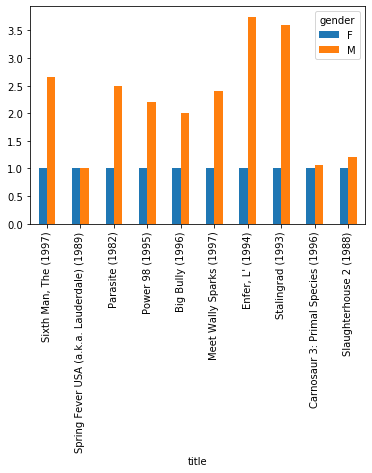

In [40]:
female_pref_bottom.plot.bar(stacked=False)

### 2. 300건 이상의 평점 정보가 있는 영화만 포함

In [41]:
ratings_by_title = data.groupby('title').size()
ratings_by_title[:10]

title
$1,000,000 Duck (1971)                37
'Night Mother (1986)                  70
'Til There Was You (1997)             52
'burbs, The (1989)                   303
...And Justice for All (1979)        199
1-900 (1994)                           2
10 Things I Hate About You (1999)    700
101 Dalmatians (1961)                565
101 Dalmatians (1996)                364
12 Angry Men (1957)                  616
dtype: int64

In [42]:
active_titles = ratings_by_title.index[ratings_by_title >= 300]
active_titles

Index([''burbs, The (1989)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1961)', '101 Dalmatians (1996)', '12 Angry Men (1957)',
       '13th Warrior, The (1999)', '20,000 Leagues Under the Sea (1954)',
       '2001: A Space Odyssey (1968)', '2010 (1984)', '28 Days (2000)',
       ...
       'X-Men (2000)', 'Year of Living Dangerously (1982)',
       'Yellow Submarine (1968)', 'You've Got Mail (1998)',
       'Young Frankenstein (1974)', 'Young Guns (1988)',
       'Young Guns II (1990)', 'Young Sherlock Holmes (1985)',
       'Zero Effect (1998)', 'eXistenZ (1999)'],
      dtype='object', name='title', length=1058)

In [43]:
mean_ratings300 = mean_ratings111.loc[active_titles]

In [44]:
# 어느 한쪽에 NA가 있는 영화 수 재확인
np.bincount(mean_ratings300['F'].isnull() == mean_ratings300['M'].isnull())

array([   0, 1058], dtype=int64)

In [45]:
mean_ratings300

gender,F,M
title,,
"'burbs, The (1989)",2.793478,2.962085
10 Things I Hate About You (1999),3.646552,3.311966
101 Dalmatians (1961),3.791444,3.500000
101 Dalmatians (1996),3.240000,2.911215
12 Angry Men (1957),4.184397,4.328421
...,...,...
Young Guns (1988),3.371795,3.425620
Young Guns II (1990),2.934783,2.904025
Young Sherlock Holmes (1985),3.514706,3.363344
